# Sentiment analysis on Book reviews

Dataset is collected from Kaggle https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews/data

In [60]:
import pandas as pd
import numpy as np

In [61]:
#reading the csv files
books = pd.read_csv("Top-100 Trending Books.csv")
books_reviews = pd.read_csv("customer reviews.csv")

In [62]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 100 non-null    int64  
 1   book title           100 non-null    object 
 2   book price           100 non-null    float64
 3   rating               97 non-null     float64
 4   author               100 non-null    object 
 5   year of publication  100 non-null    int64  
 6   genre                100 non-null    object 
 7   url                  100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [63]:
books_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 920 non-null    int64 
 1   book name           920 non-null    object
 2   review title        920 non-null    object
 3   reviewer            920 non-null    object
 4   reviewer rating     920 non-null    int64 
 5   review description  920 non-null    object
 6   is_verified         920 non-null    bool  
 7   date                920 non-null    object
 8   timestamp           920 non-null    object
 9   ASIN                920 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 65.7+ KB


In [64]:
#checking for null values in the dataframe
missing_values = books_reviews.isnull().sum()
print(missing_values)

Sno                   0
book name             0
review title          0
reviewer              0
reviewer rating       0
review description    0
is_verified           0
date                  0
timestamp             0
ASIN                  0
dtype: int64


In [65]:
#import textblob library for sentiment analysis
from textblob import TextBlob

In [66]:
#combine the review title and description for analyzing
books_reviews['text_combined'] = books_reviews['review title'] + ' ' + books_reviews['review description']

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity #gives value between -1 to 1

books_reviews['sentiment_score'] = books_reviews['text_combined'].apply(analyze_sentiment)

#assigning labels based on sentiment score
books_reviews['sentiment'] = books_reviews['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

print(books_reviews[['text_combined', 'sentiment_score', 'sentiment']])

                                         text_combined  sentiment_score  \
0    Unbelievably impressive. Her torn life on pape...         0.220704   
1    What a heartbreaking story "There have been so...        -0.178852   
2    Britney you are so invincible! You are an insp...         0.037864   
3    Fast Read, Sad Story I have been a fan of Brit...         0.067659   
4    Buy it, it’s worth the read! Whether or not yo...         0.160561   
..                                                 ...              ...   
915  The best child/grandmother book ever written T...         0.462245   
916  Great book We get this book for all our grandc...         0.380000   
917  Fun book, makes you laugh I saw a grandma read...         0.375000   
918  Cutest beck ever!! I have ordered this book ov...         0.340000   
919  Awesome Book This book was hysterical! My daug...         0.290625   

    sentiment  
0    positive  
1    negative  
2    positive  
3    positive  
4    positive  
.. 

In [67]:
#renaming the title for merging the data frames
books.rename(columns={'book title': 'book name'}, inplace=True)

In [68]:
merged_df = pd.merge(books, books_reviews[['book name', 'sentiment','sentiment_score']], on='book name', how='left')

print(merged_df[['book name', 'rating', 'sentiment']])

                        book name  rating sentiment
0    Iron Flame (The Empyrean, 2)     4.1       NaN
1                 The Woman in Me     4.5  positive
2                 The Woman in Me     4.5  negative
3                 The Woman in Me     4.5  positive
4                 The Woman in Me     4.5  positive
..                            ...     ...       ...
898              The Wonky Donkey     4.8  positive
899              The Wonky Donkey     4.8  positive
900              The Wonky Donkey     4.8  positive
901              The Wonky Donkey     4.8  positive
902              The Wonky Donkey     4.8  positive

[903 rows x 3 columns]


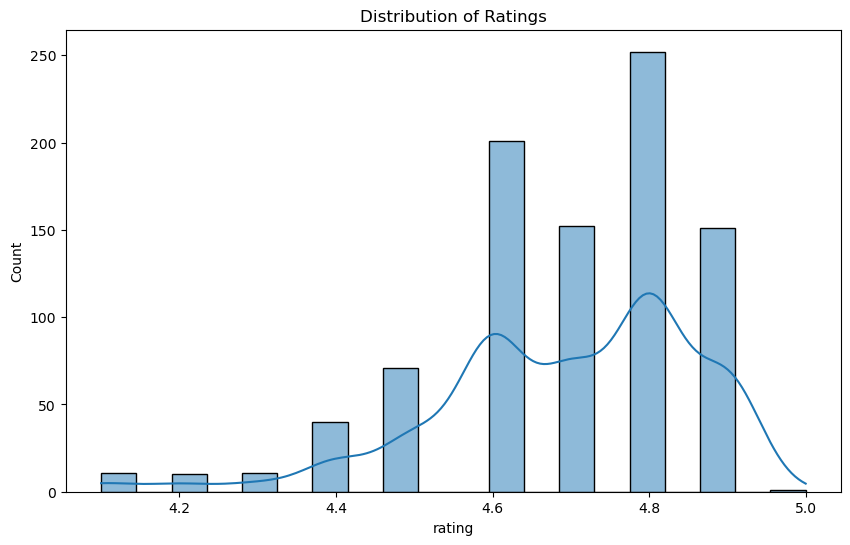

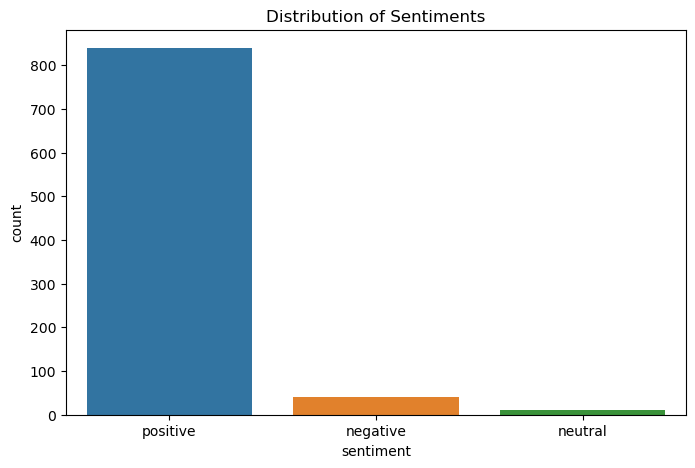

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=merged_df)
plt.title('Distribution of Sentiments')
plt.show()


In [70]:
# Count the occurrences of each sentiment for each book
sentiment_counts = merged_df.groupby(['book name', 'sentiment']).size().unstack(fill_value=0)

print(sentiment_counts)

sentiment                                           negative  neutral  \
book name                                                               
A Court of Mist and Fury (A Court of Thorns and...         0        0   
A Court of Thorns and Roses (A Court of Thorns ...         0        0   
A Court of Thorns and Roses Paperback Box Set (...         1        0   
A Court of Wings and Ruin (A Court of Thorns an...         0        0   
A Little Life                                              0        0   
...                                                      ...      ...   
Turkey Trouble                                             0        0   
Verity                                                     1        0   
Where's Bluey?: A Search-and-Find Book                     0        0   
Where's Spot?                                              0        1   
World of Eric Carle, Around the Farm 30-Button ...         0        0   

sentiment                                         

In [71]:
# Sort the DataFrame based on the count of positive ratings in descending order
top_positive_books = sentiment_counts.sort_values(by='positive', ascending=False)

In [72]:
top_positive_books.head(10)

sentiment,negative,neutral,positive
book name,,,
The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games),8,0,32
"A Court of Mist and Fury (A Court of Thorns and Roses, 2)",0,0,10
I Love You Like No Otter: A Funny and Sweet Animal Board Book for Babies and Toddlers this Christmas (Punderland),0,0,10
Israel: A Simple Guide to the Most Misunderstood Country on Earth,0,0,10
Just Because,0,0,10
Lessons in Chemistry: A Novel,0,0,10
"A Court of Thorns and Roses (A Court of Thorns and Roses, 1)",0,0,10
Outlive: The Science and Art of Longevity,0,0,10
Paw Patrol Phonics: 12 Books in 1,0,0,10
